In [1]:
import cv2
import mediapipe as mp
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
def calculate_angle(a,b,c):
    a = np.array(a) 
    b = np.array(b) 
    c = np.array(c) 
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [3]:
def javelin_angle(image):

    font = cv2.FONT_HERSHEY_COMPLEX


    
    final_angle = 0
    

    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


    edges = cv2.Canny(gray,200,200,apertureSize=3)

    lines_list = []
    lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180, 
                threshold=60, # Define the threshold here 
                minLineLength=5, 
                maxLineGap=10
                )




    for points in lines:
        x1,y1,x2,y2=points[0]
        a = (y2-y1)/(x2-x1)
        angle = math.atan(a)
        javelin_throw = math.degrees(angle)
        javelin_throw_angle = javelin_throw*(-1)
        javelin_throw_angle = round(javelin_throw_angle, 2)

        if javelin_throw_angle > 20 and javelin_throw_angle<60:

            final_angle = javelin_throw_angle
            cv2.line(image,(x1,y1),(x2,y2),(120,255,140),3)
            lines_list.append([(x1,y1),(x2,y2)])
            string1 = str(x1) + " " + str(y1) 
            string2 = str(x2) + " " + str(y2)
            string3 = str(javelin_throw_angle)
            cv2.circle(image, (x1,y1), radius=4, color=(0, 0, 255), thickness=-4)
            cv2.circle(image, (x2,y2), radius=4, color=(255, 0, 0), thickness=-4)    
            cv2.putText(image,string2, (x2,y2), font, 0.6, (0,255,255))                       
            cv2.putText(image, string1, (x1, y1), font, 0.6, (0, 255, 255))
#             cv2.putText(image, string3, (x1,y1), font, 0.8, (120, 200, 240))





    
#         cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
#         cv2.putText(image, 'ANGLE OF THROW', (15,12), 
#                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
#         cv2.putText(image, str(final_angle), 
#                             (300,60), 
#                             cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 2, cv2.LINE_AA)
#     else:
#         cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
#         cv2.putText(image, 'ANGLE OF THROW', (15,12), 
#                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
#         cv2.putText(image, str(javelin_throw_angle), 
#                             (200,60), 
#                             cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2, cv2.LINE_AA)
    return final_angle
    

In [4]:
arr_elbow = []
count=1
arr_frame = []
arr_knee = []
arr_hip = []
arr_javelin = []

# Add video here
cap = cv2.VideoCapture('javelin_throw_video.mp4')
counter = 0
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            angle_knee = calculate_angle(hip,knee, ankle)
            
            angle_hip = calculate_angle(shoulder, hip, knee)
            
            arr_elbow.append(angle)
            count+=1
            arr_frame.append(count)
            arr_knee.append(angle_knee)
            arr_hip.append(angle_hip)
            
            
            
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [580, 306]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA
                                )
            
            cv2.putText(image, str(angle_knee), 
                           tuple(np.multiply(knee, [580, 306]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2, cv2.LINE_AA
                                )
            
            cv2.putText(image, str(angle_hip), 
                          tuple(np.multiply(hip, [580, 306]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                 )
            
            
            if angle_hip<152:
                counter +=1
                print(counter)
                       
                       
        except:
            pass


        javelin_throw_angle = javelin_angle(image)
        arr_javelin.append(javelin_throw_angle)
        
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'STEPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(image, 'ANGLE OF JAVELIN', (100,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(javelin_throw_angle), (120,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),2, cv2.LINE_AA)
        
        
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(150) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<ipython-input-3-6648c11a084b>:30: RuntimeWarning: divide by zero encountered in int_scalars
  a = (y2-y1)/(x2-x1)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [18]:
y=arr_elbow
x=arr_frame
len(x)

139

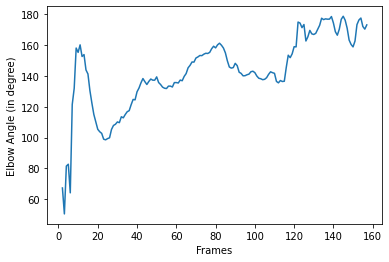

In [62]:
plt.plot(x, y)
plt.xlabel("Frames")
plt.ylabel("Elbow Angle (in degree)")
plt.show()



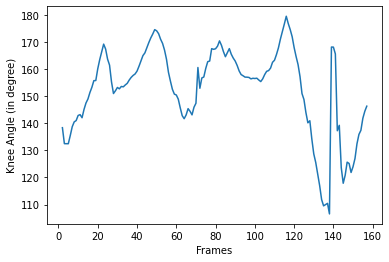

In [63]:
plt.plot(x, arr_knee)
plt.xlabel("Frames")
plt.ylabel("Knee Angle (in degree)")
plt.show()

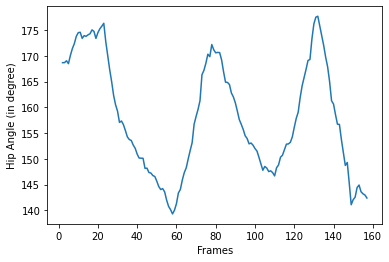

In [64]:
plt.plot(x, arr_hip)
plt.xlabel("Frames")
plt.ylabel("Hip Angle (in degree)")
plt.show()

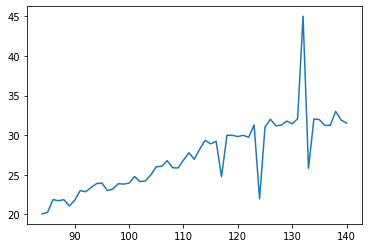

In [22]:
frames_javelin = x[82:len(x)]
arr_javel = arr_javelin[82:len(x)]
plt.plot(frames_javelin, arr_javel)
plt.show()